<a href="https://colab.research.google.com/github/PigeonLore/Sales-Predictions/blob/main/SalesPredicitons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Coding Dojo | Data Science/Week 2: Pandas/Data/sales_predictions.csv')

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 1 Count number of rows and columns

In [180]:
num_rows, num_column = df.shape

print(f'There are {num_rows} rows and {num_column} columns.')

There are 8523 rows and 12 columns.


# 2 Datatypes of each 

In [181]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# 3 Identify duplicates

## Checking for duplicated data

In [182]:
df.duplicated().sum()

0

# 4 Identify missing values

In [183]:
missing_values = df.isnull().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Identifying inconsistencies

In [184]:
for col in df:
  print(col, df[col].unique())

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Weight [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.63

In [185]:
## Item Fat Content contains redundancies that can be replaced.
df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df['Item_Fat_Content'].replace(['reg'],['Regular'],inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# Since Outlet_Size indicates only the size of the outlet; it would be assumed this isnt important to the purpose of sales predictions, so it is excluded from the data frame.

In [186]:
df.drop('Outlet_Size', axis = 1, inplace=True)
#df['Item_Weight'].sum()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


# The only thing that would be considered preserving is numerical data regarding missing values. The missing values are averaged by the surrounding data.

In [187]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Weight'].sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


# Producing minimum, maximum, and average values for all numerical columns.

### First select only columns that have the datatypes of integers and floats using .select_dtypes() method.

In [188]:
df_Nums = df.select_dtypes(include=['float64','int64'])
df_Nums.value_counts()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
4.555        0.034329         110.1544  1987                       1230.3984            1
14.350       0.028519         109.2228  1998                       221.0456             1
14.500       0.000000         169.6448  2004                       2045.3376            1
                              159.3262  2004                       2864.2716            1
                              154.4682  1987                       1524.6820            1
                                                                                       ..
11.100       0.059797         151.8366  1987                       1057.9562            1
             0.054080         165.9526  2007                       2631.2416            1
             0.053765         163.1526  2004                       1808.9786            1
             0.053731         165.1526  1987                       1480.0734            1
21.350       0.

### Then assign variables to df_Nums for the mean, max, and min values of each column.

In [189]:
df_Means = df_Nums.mean()
df_Max = df_Nums.max()
df_Min = df_Nums.min()


## Diplay Mean, Min, and Max values.

In [190]:
df_Nums.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Project 3: Creating statistical analysis on present sales data.

In [191]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


## Setup plot layout for legibility

In [192]:
plt.style.use('dark_background')


In [193]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350


## Histogram

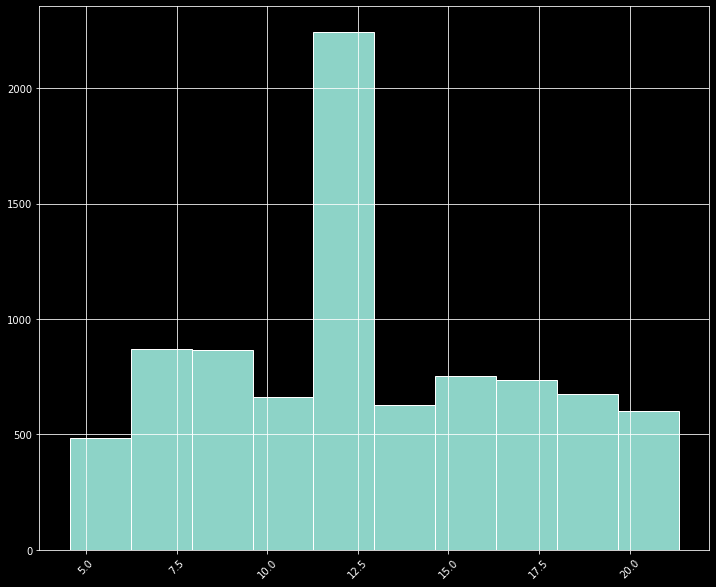

In [194]:

plt.xticks(rotation=45)
df['Item_Weight'].hist(
    figsize=(12,10),
    linewidth=1,
    edgecolor='white',

    )

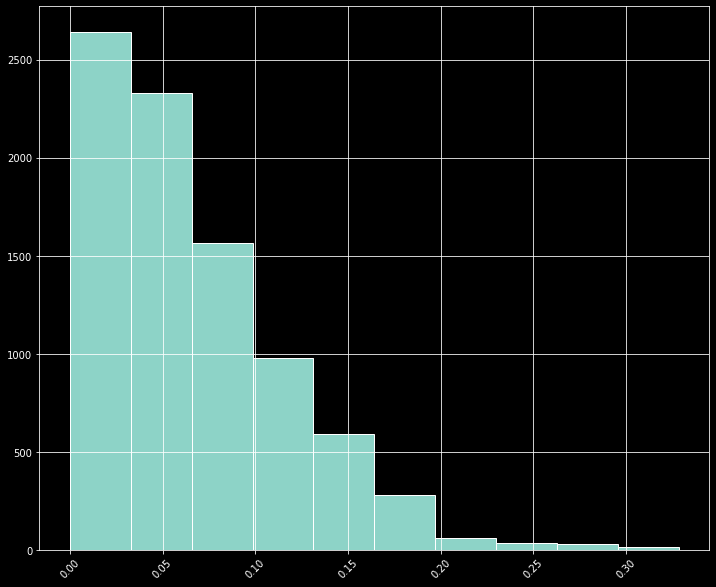

In [195]:

plt.xticks(rotation=45)
df['Item_Visibility'].hist(
    figsize=(12,10),
    linewidth=1,
    edgecolor='white',
    
    )

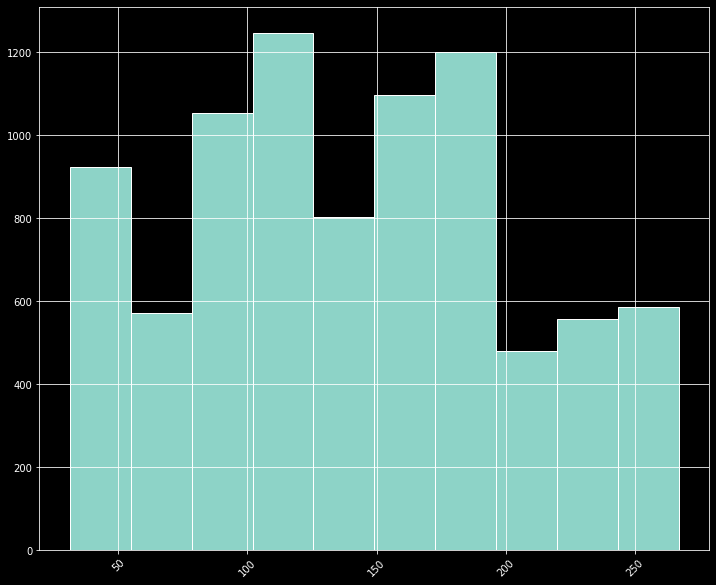

In [196]:

plt.xticks(rotation=45)
df['Item_MRP'].hist(
    figsize=(12,10),
    linewidth=1,
    edgecolor='white',
    
    )

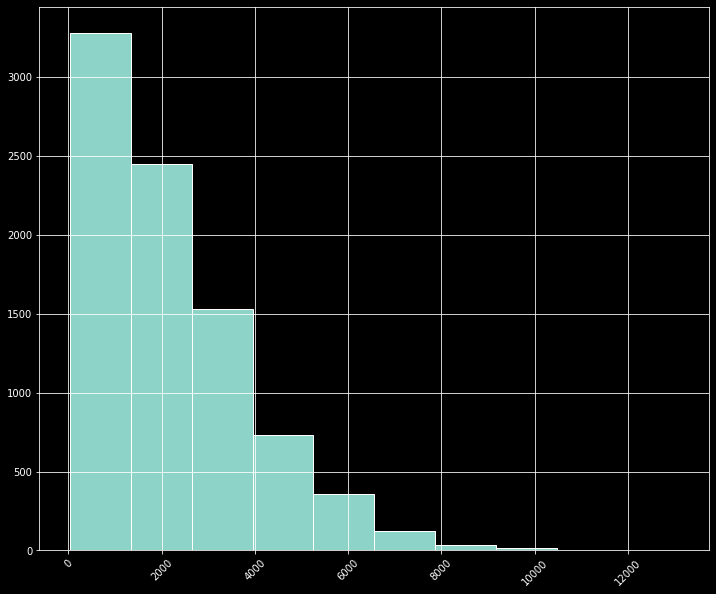

In [197]:

plt.xticks(rotation=45)
df['Item_Outlet_Sales'].hist(
    figsize=(12,10),
    linewidth=1,
    edgecolor='white',
    
    )

## Boxplot

Text(0.5, 0, 'Item Outlet Sales')

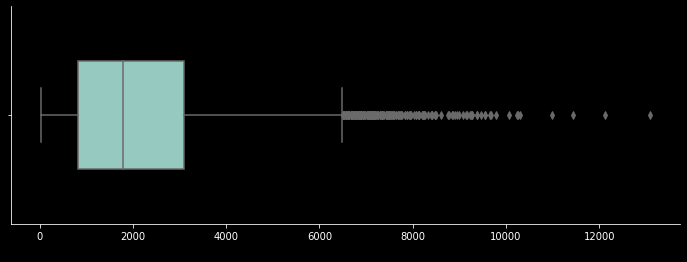

In [198]:
from seaborn.matrix import despine

fig, ax = plt.subplots(figsize=(12,4))

ItemVis = df['Item_Outlet_Sales']

# sns.set(style='darkgrid')
despine()

enc = dict(boxstyle='square',
           facecolor='white'
           )

sns.boxplot(x=ItemVis,
            width=.5
            )
plt.xlabel('Item Outlet Sales',color='k')

Text(21.35, 0.4, 'Heaviest')

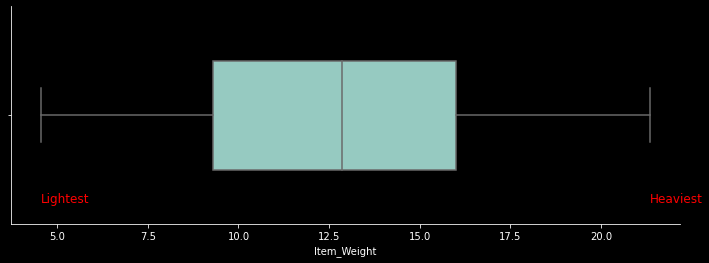

In [199]:
from seaborn.matrix import despine

fig, ax = plt.subplots(figsize=(12,4))

itemWeight = df['Item_Weight']

# sns.set(style='darkgrid')
despine()

enc = dict(boxstyle='square',
           facecolor='white'
           )

sns.boxplot(x=itemWeight,
            width=.5
            )

ax.text(itemWeight.min(),.4,'Lightest',fontsize=12,color='#ff0000')
ax.text(itemWeight.max(),.4,'Heaviest',fontsize=12,color='#ff0000')

Text(266.8884, 0.4, 'Most Expensive')

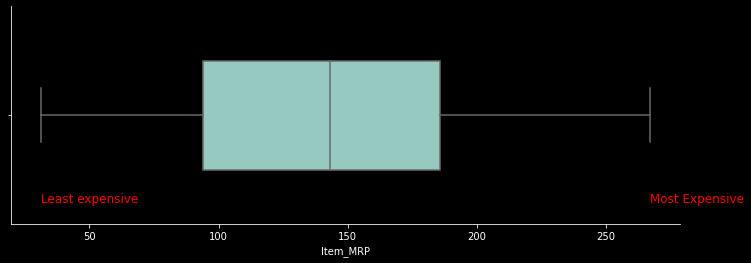

In [200]:
from seaborn.matrix import despine

fig, ax = plt.subplots(figsize=(12,4))

itemMRP = df['Item_MRP']

# sns.set(style='darkgrid')
despine()

enc = dict(boxstyle='square',
           facecolor='white'
           )

sns.boxplot(x=itemMRP,
            width=.5
            )

ax.text(itemMRP.min(),.4,'Least expensive',fontsize=12,color='#ff0000')
ax.text(itemMRP.max(),.4,'Most Expensive',fontsize=12,color='#ff0000')

## Heatmap

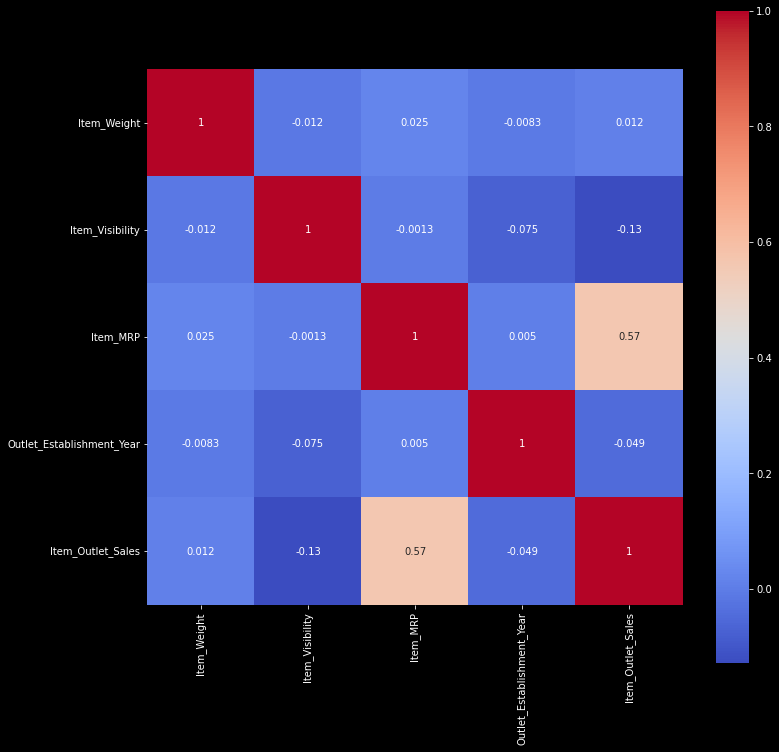

In [201]:

fig, ax = plt.subplots(figsize=(12,12))

corr = df.corr()

sns.heatmap(corr, annot=True,square=True,cmap='coolwarm')

## Displayed by this heatmap, there is a strong corrilation between item outlet sales and item market retail price.

In [202]:
# x = df['Item_MRP']
# m = np.mean(x)
# N = len(x)
# SD = np.sqrt(sum(abs(x-m)**2)/N)
# SD